In [ ]:
!pip install autoviz
!pip install xlrd

In [ ]:
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

from autoviz.AutoViz_Class import AutoViz_Class
from pandas_profiling import ProfileReport
from plotly.offline import init_notebook_mode, iplot, plot
from wordcloud import WordCloud

from torch.utils.data import Dataset

In [ ]:
init_notebook_mode()
template_style = 'plotly_white'

In [ ]:
# Load the data
class Dataset(Dataset):
    def __init__(self, path):
        self.load_data = pd.read_csv(path, encoding='ISO-8859-1')
    
    def __len__(self):
        return len(self.load_data)
    
    def __getitem__(self):
        return self.load_data

root = '/content/drive/MyDrive/Program/Python/Data ML DL/Datasets/US  E-commerce records 2020.csv'
load_data = Dataset(root)

In [ ]:
# Info about the dataframe
load_data.__getitem__().info()

In [ ]:
# Describe method
load_data.__getitem__().describe()

In [ ]:
# Get a view of unique value in column, e.g 'Ship Mode'
load_data.__getitem__()['Ship Mode'].unique()

In [ ]:
# NaN value for each column
load_data.__getitem__().isnull().sum()

In [ ]:
# Largest three of the sales in 2020
load_data.__getitem__().nlargest(3, 'Sales')

In [ ]:
# Highest sales data
load_data.__getitem__().iloc[load_data.__getitem__()['Sales'].argmax()]

In [ ]:
# Find average discount, e.g for Chairs
mask = load_data.__getitem__()['Sub-Category'] == 'Chairs'
load_data.__getitem__()[mask]['Discount'].mean()

## Total profit and sales by Sub-Category

In [ ]:
load_data.__getitem__()['Profit Margin'] = load_data.__getitem__()['Profit'] / load_data.__getitem__()['Sales']

# Group the dataframe by sub category
load_data_by_subcategory = load_data.__getitem__().groupby('Sub-Category').sum()

# Reset index for new dataset
load_data_by_subcategory.reset_index(inplace=True)
load_data_by_subcategory.head()

In [ ]:
fig = go.Bar(
    x = load_data.__getitem__()['Sub-Category'],
    y = load_data.__getitem__()['Profit'],
    name = 'Profit per Sub-Category',
    text = 'Profit'
)

data = [fig]
layout = go.Layout(barmode='group')
figure = go.Figure(data=data, layout=layout)
iplot(figure)

## AutoViz Report
[documentation](https://pythonrepo.com/repo/AutoViML-AutoViz-python-data-validation)

Shape of your Data Set loaded: (3312, 20)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


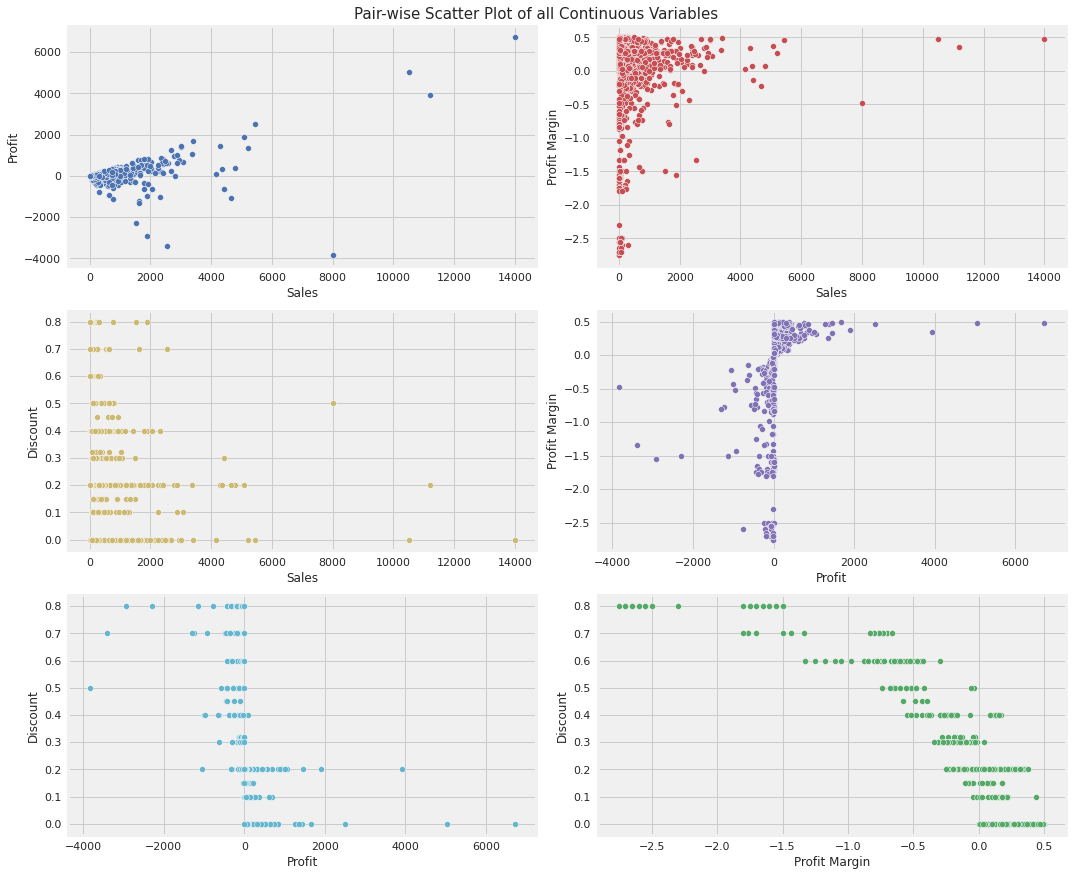

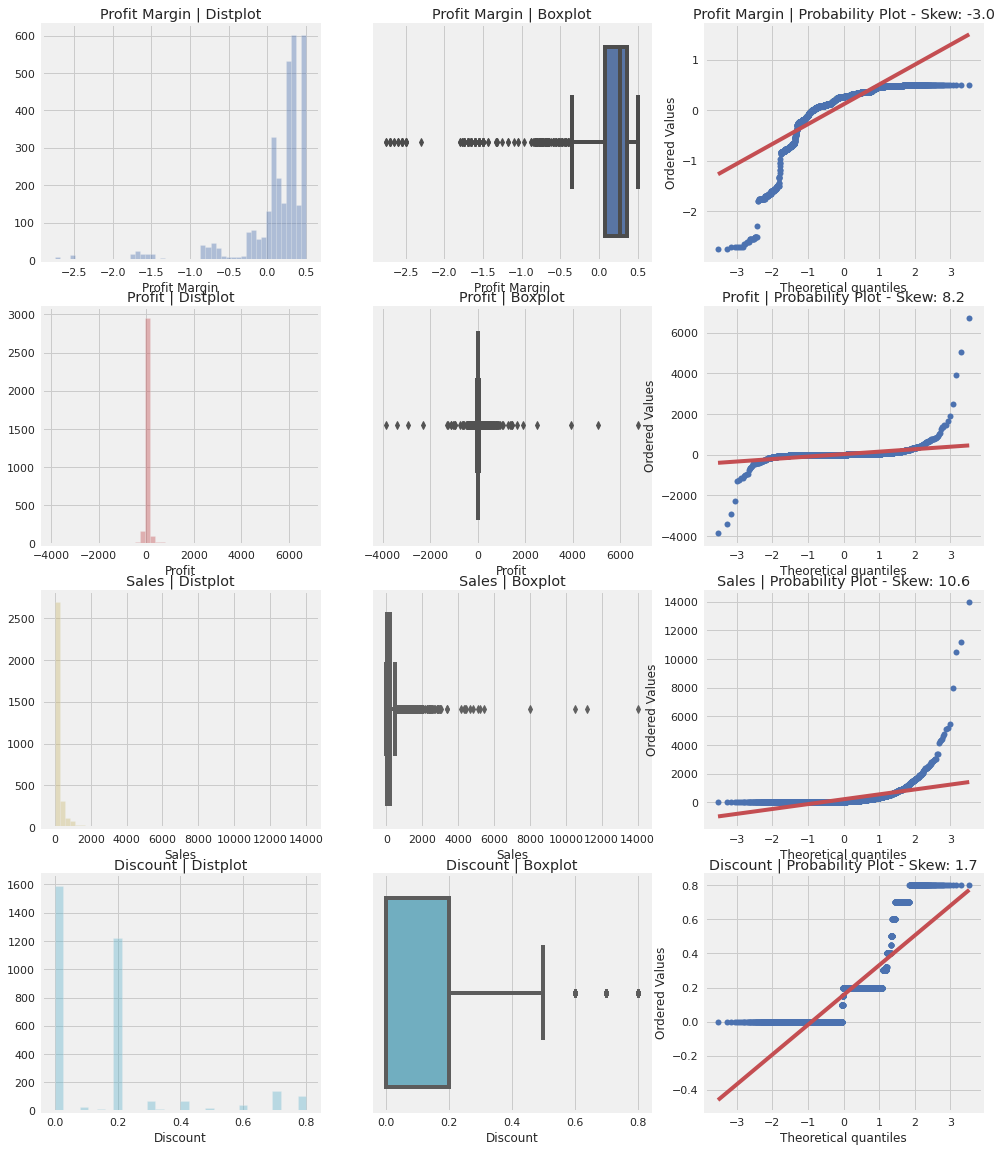

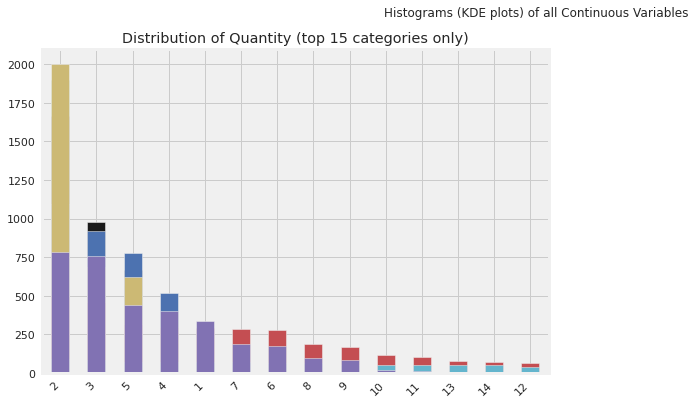

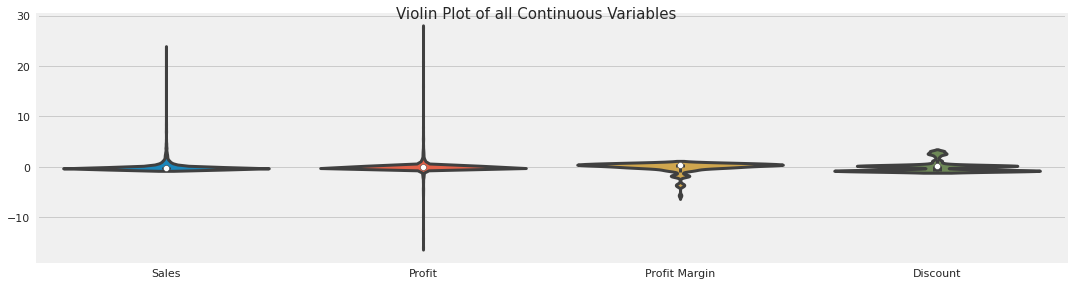

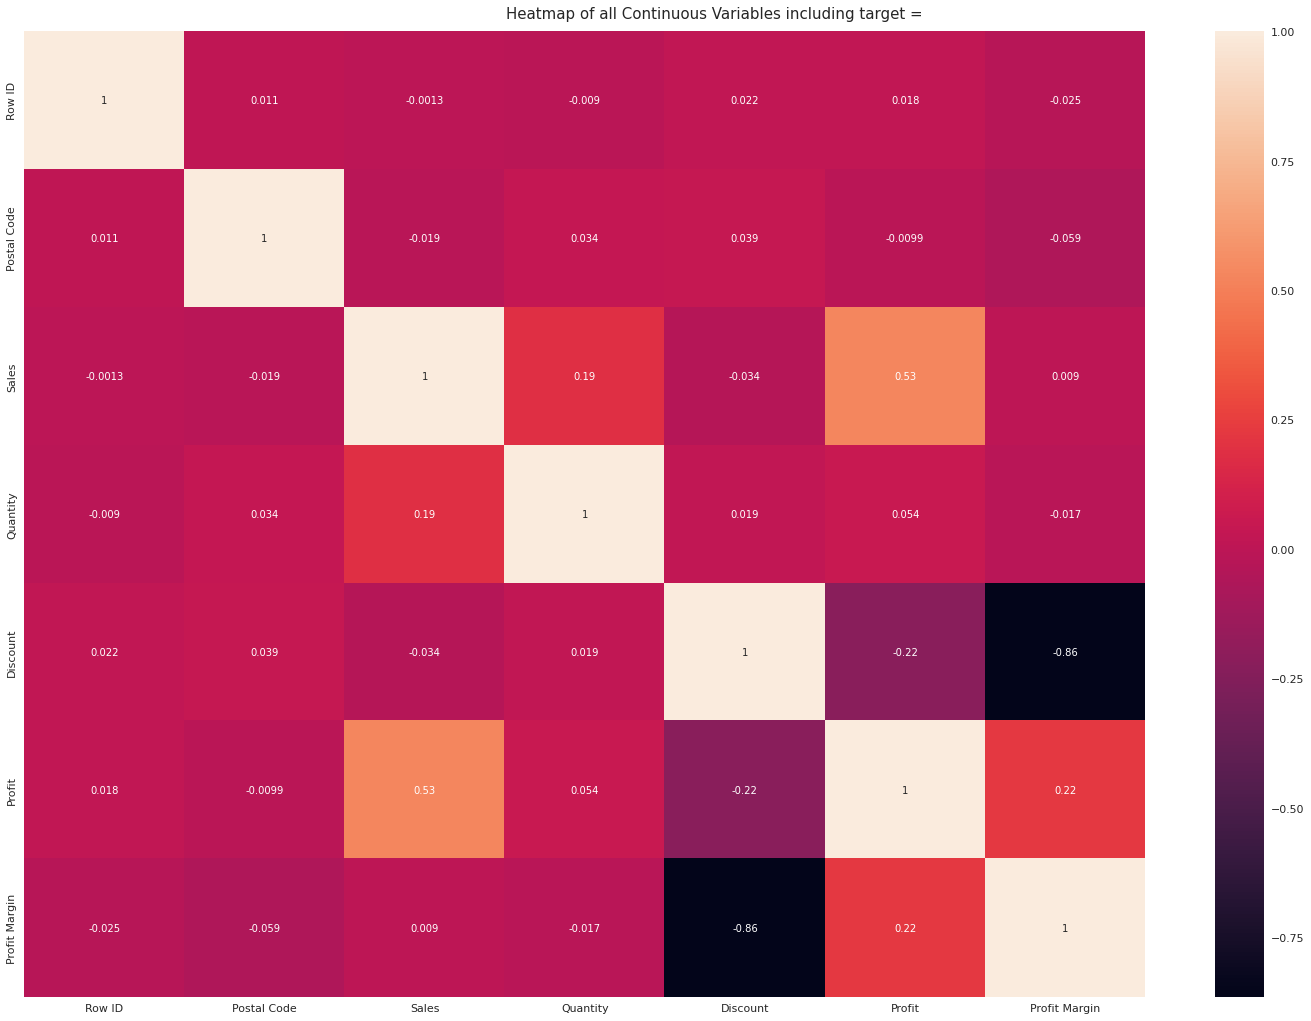

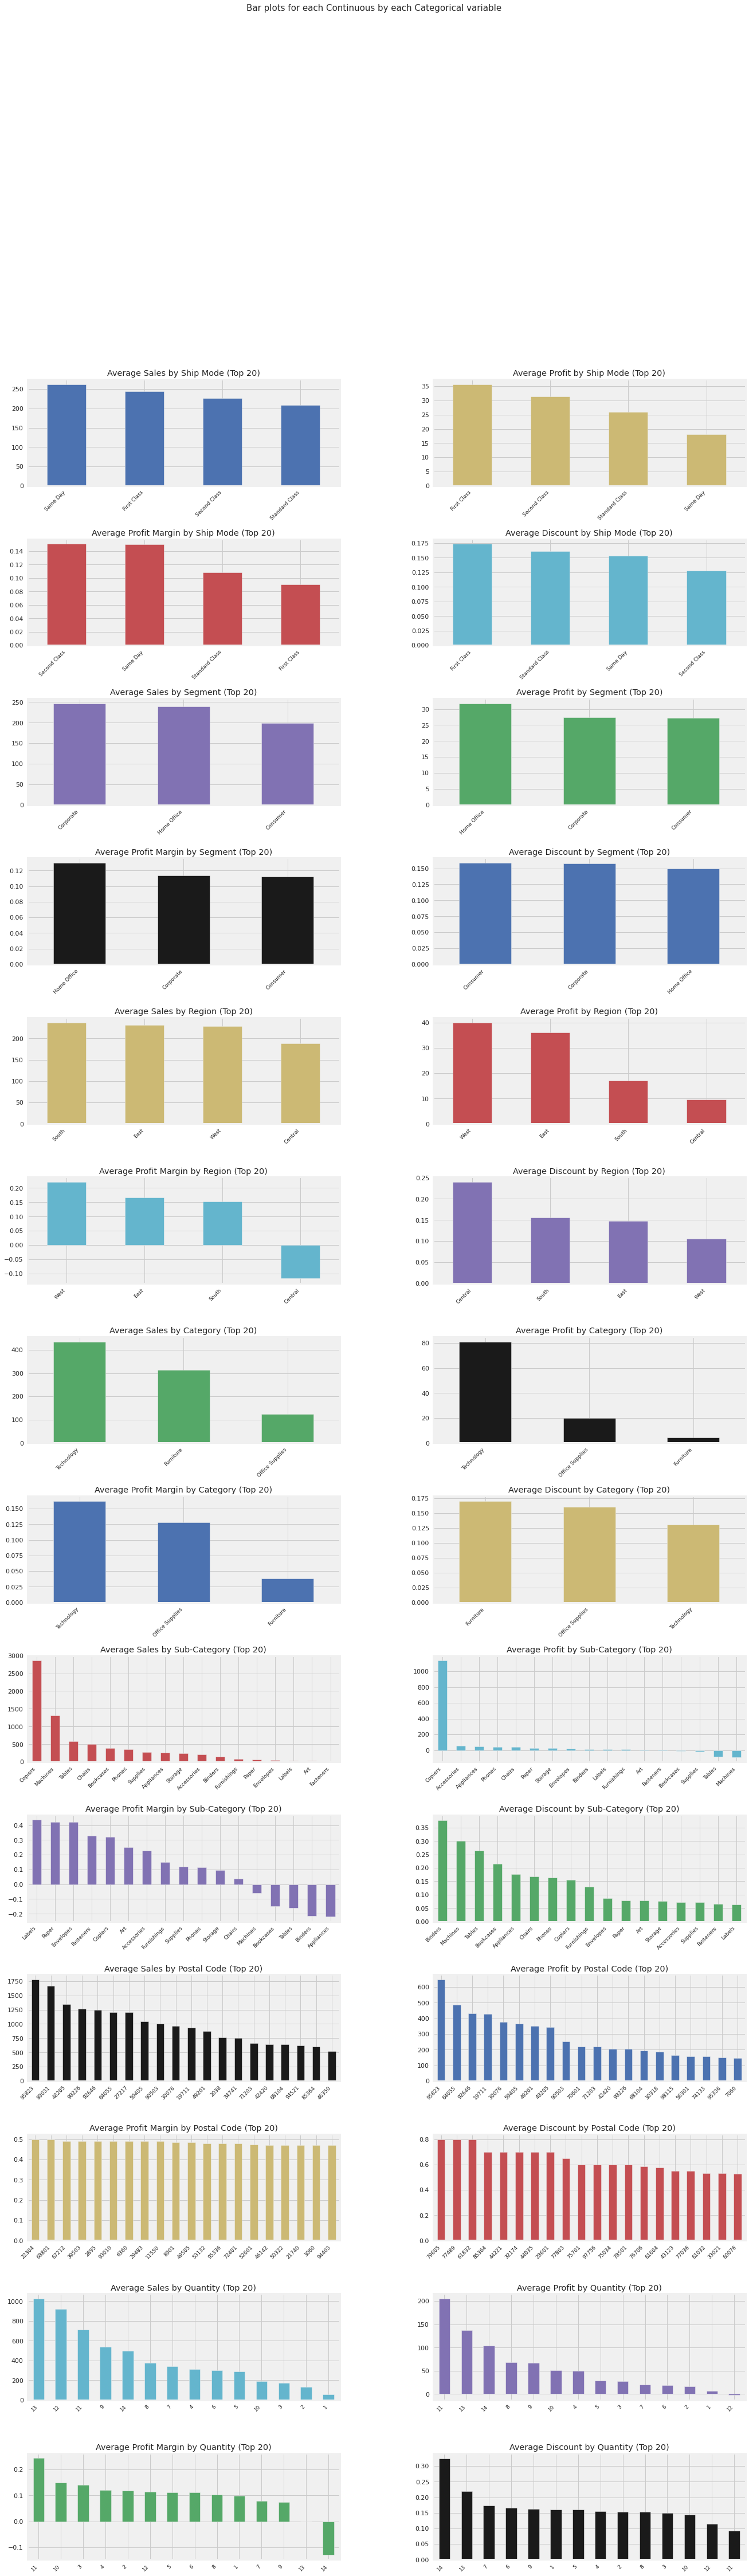

Time to run AutoViz (in seconds) = 15

 ###################### VISUALIZATION Completed ########################


In [ ]:
AV = AutoViz_Class()
df_autoviz = AV.AutoViz(filename='', dfte=load_data.__getitem__())